# <font color='teal'> ***Connecting to G-Drive***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color='teal'> ***Importing the Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# <font color='teal'>  ***Loading the Data***

In [4]:
train = pd.read_csv('/content/drive/MyDrive/A_Projects/Model_ChatBot/Predictive Model/Datasets/train.csv')
train.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39183,30,blue-collar,single,basic.4y,no,yes,no,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
39184,32,blue-collar,married,basic.9y,no,no,no,cellular,apr,fri,...,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
39185,46,blue-collar,divorced,basic.4y,unknown,no,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
39186,38,technician,single,professional.course,no,no,no,cellular,jul,tue,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
39187,34,technician,married,professional.course,no,yes,no,cellular,aug,fri,...,8,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no


In [5]:
test = pd.read_csv('/content/drive/MyDrive/A_Projects/Model_ChatBot/Predictive Model/Datasets/test.csv')
test.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1995,28,blue-collar,married,basic.4y,no,no,no,cellular,may,tue,442,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1
1996,46,self-employed,married,basic.9y,unknown,no,no,cellular,nov,mon,48,1,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8
1997,43,admin.,divorced,university.degree,no,yes,no,cellular,apr,fri,882,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
1998,56,management,married,basic.4y,unknown,unknown,unknown,telephone,may,fri,242,3,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0
1999,35,entrepreneur,divorced,professional.course,unknown,no,no,cellular,aug,tue,255,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1


# <font color='teal'> ***Data Pre-Processing***

## **Checking Null Values**

**1- Training Set**

In [6]:
train.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


**2- Testing Set**

In [7]:
test.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


## **Checking Duplicated Values**

**1- Training Set**

In [8]:
train.duplicated().sum()

11

**2- Testing Set**

In [9]:
test.duplicated().sum()

0

## **Checking Info**

**1- Training Set**

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39188 non-null  int64  
 1   job             39188 non-null  object 
 2   marital         39188 non-null  object 
 3   education       39188 non-null  object 
 4   default         39188 non-null  object 
 5   housing         39188 non-null  object 
 6   loan            39188 non-null  object 
 7   contact         39188 non-null  object 
 8   month           39188 non-null  object 
 9   day_of_week     39188 non-null  object 
 10  duration        39188 non-null  int64  
 11  campaign        39188 non-null  int64  
 12  pdays           39188 non-null  int64  
 13  previous        39188 non-null  int64  
 14  poutcome        39188 non-null  object 
 15  emp.var.rate    39188 non-null  float64
 16  cons.price.idx  39188 non-null  float64
 17  cons.conf.idx   39188 non-null 

**2- Testing Set**

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2000 non-null   int64  
 1   job             2000 non-null   object 
 2   marital         2000 non-null   object 
 3   education       2000 non-null   object 
 4   default         2000 non-null   object 
 5   housing         2000 non-null   object 
 6   loan            2000 non-null   object 
 7   contact         2000 non-null   object 
 8   month           2000 non-null   object 
 9   day_of_week     2000 non-null   object 
 10  duration        2000 non-null   int64  
 11  campaign        2000 non-null   int64  
 12  pdays           2000 non-null   int64  
 13  previous        2000 non-null   int64  
 14  poutcome        2000 non-null   object 
 15  emp.var.rate    2000 non-null   float64
 16  cons.price.idx  2000 non-null   float64
 17  cons.conf.idx   2000 non-null   f

## **Checking Outliers**

In [12]:
def create_box_plots(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=np.number).columns

    for col in columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.show()

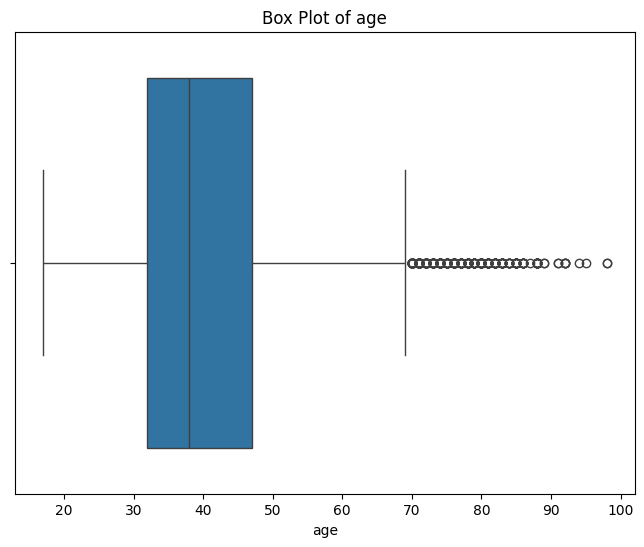

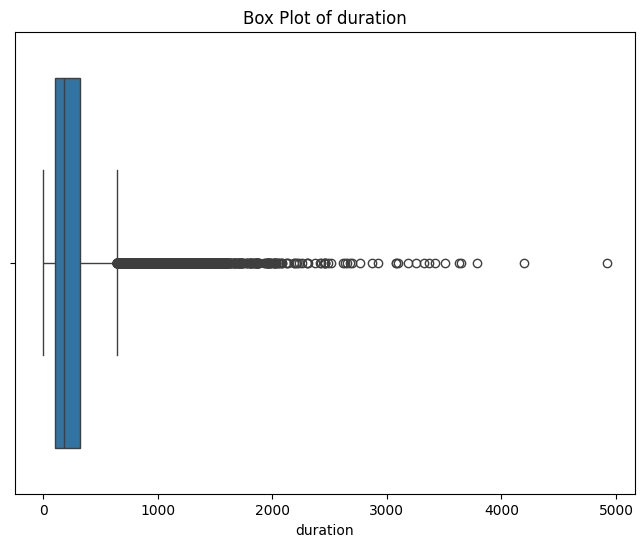

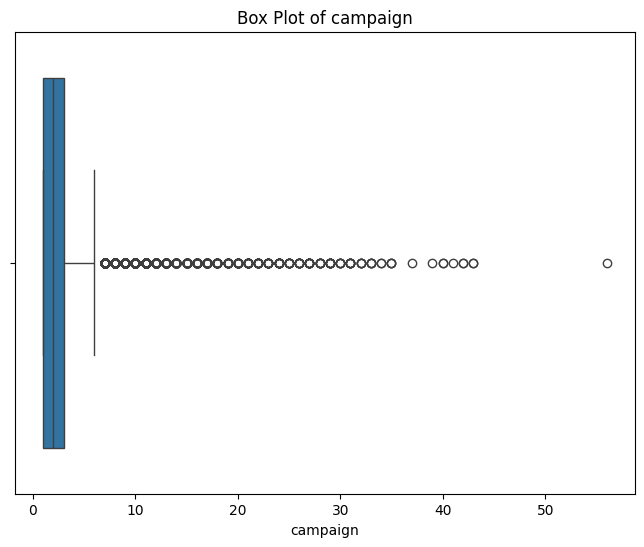

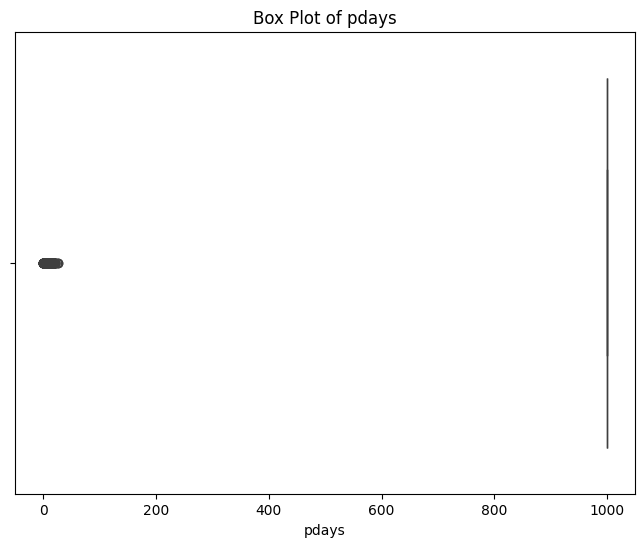

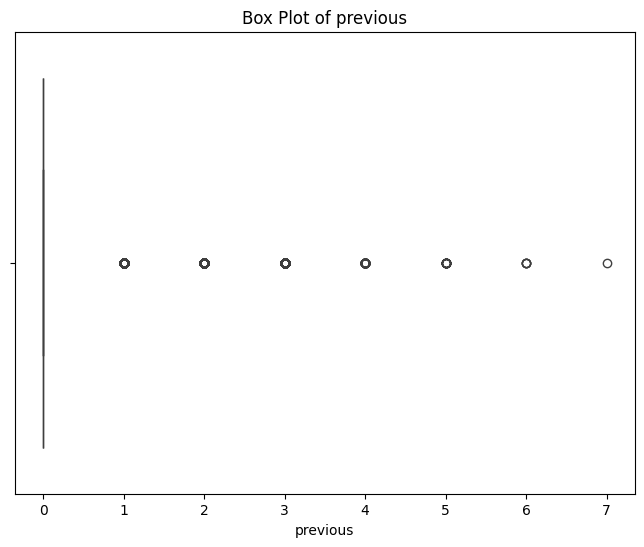

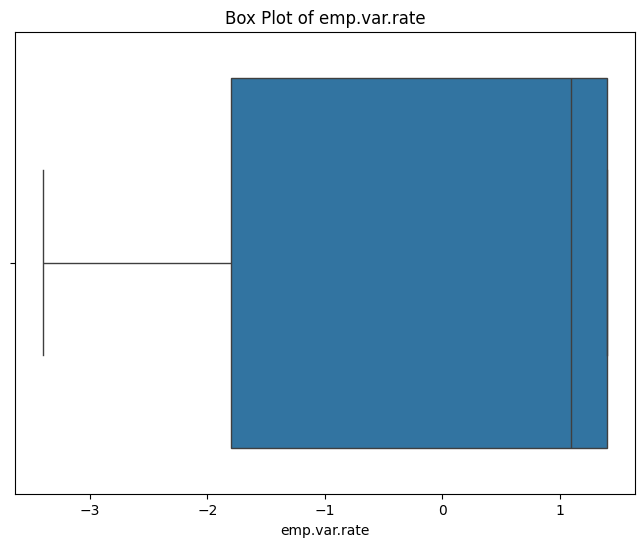

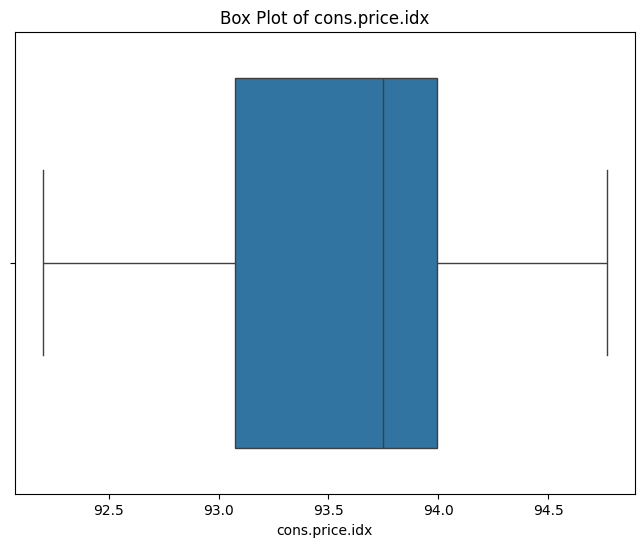

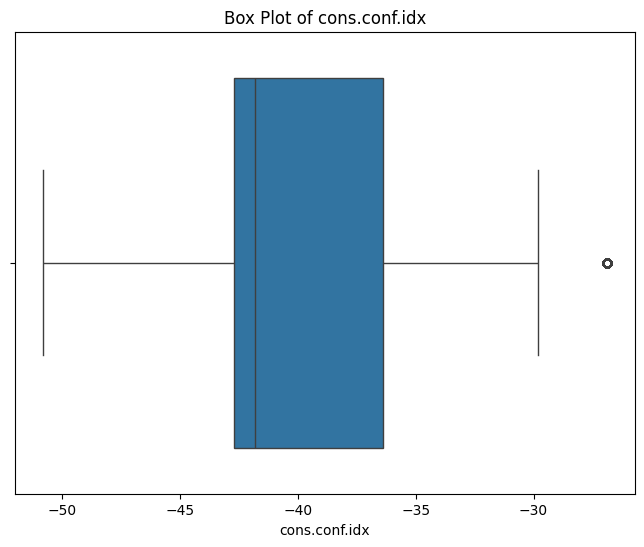

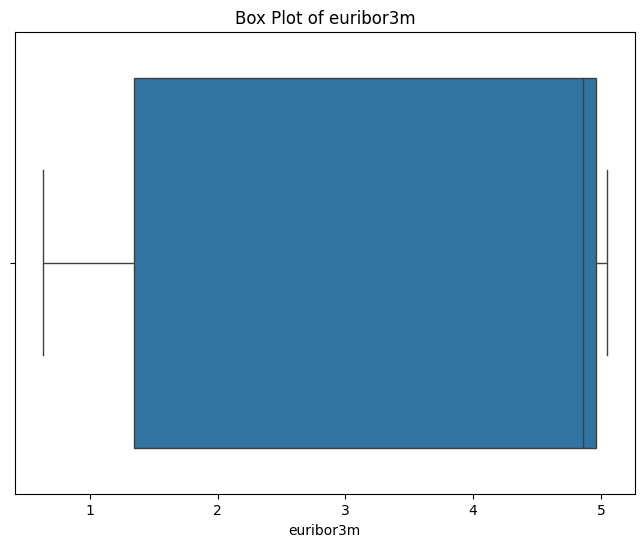

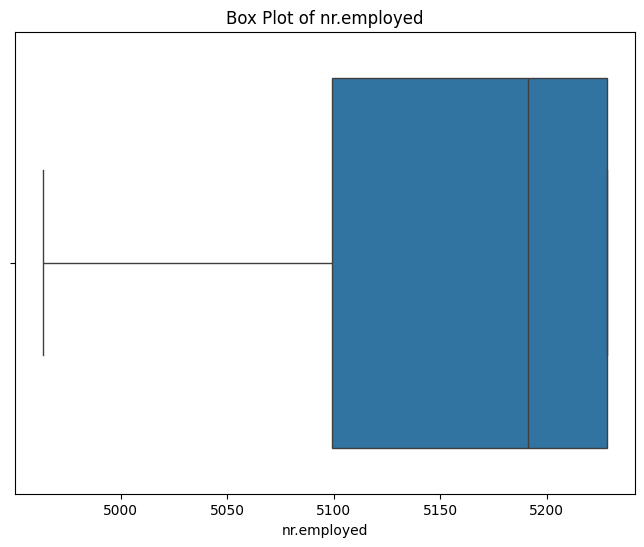

In [13]:
create_box_plots(train)

## **Removing Duplicated Values**

In [14]:
train.drop_duplicates(inplace=True, keep=False)
train.duplicated().sum()

0

## **Removing Outliers**

In [15]:
def remove_outliers(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=np.number).columns

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [16]:
train = remove_outliers(train)

## **Saving the Dataset**

**Here the cleaned dataset is saved so that it can be imported to power BI or Tableau for performing the EDA of the data**

In [ ]:
# train.to_csv('/content/drive/MyDrive/A_Projects/Model_ChatBot/Predictive Model/Datasets/cleaned_train.csv', index=False)

# <font color='teal'> ***Explortary Data Analysis***

In [ ]:
image_dir = "/content/drive/MyDrive/A_Projects/Model_ChatBot/Tableau_EDA_Images"

def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            try:
                img_path = os.path.join(directory, filename)
                img = Image.open(img_path)
                images.append(img)
            except IOError as e:
                print(f"Error loading {filename}: {e}")
    return images

# Load the images
image_data = load_images(image_dir)

## **Average Duration Per Day**

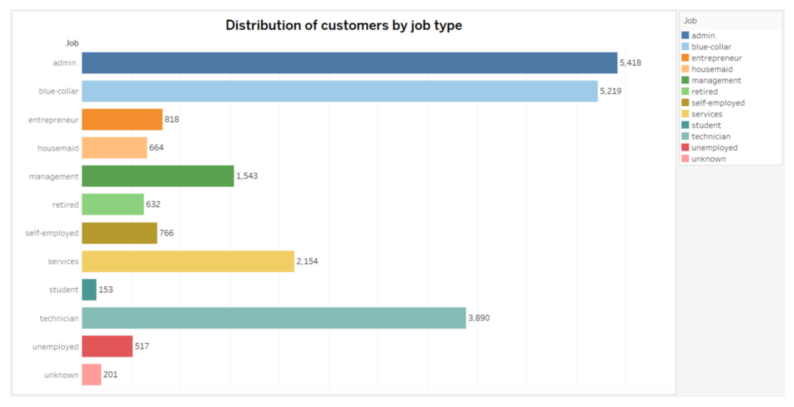

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(image_data[0], interpolation='bicubic')
plt.axis('off')
plt.show()

## **Number of Customers in Different Education Levels**

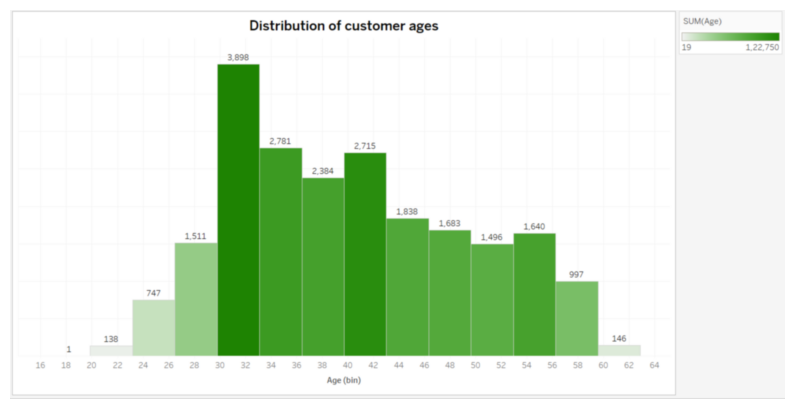

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(image_data[2], interpolation='bicubic')
plt.axis('off')
plt.show()

## **Ratio of Customers who Subscribed vs who did not subscribe**

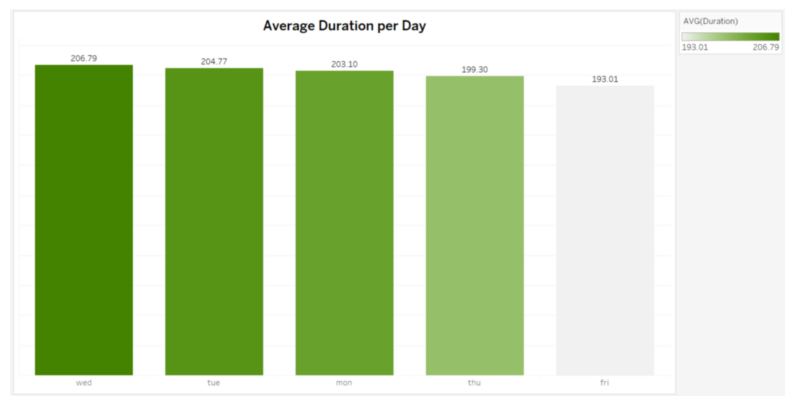

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(image_data[3], interpolation='bicubic')
plt.axis('off')
plt.show()

## **Count of Customers in Different Job Types**

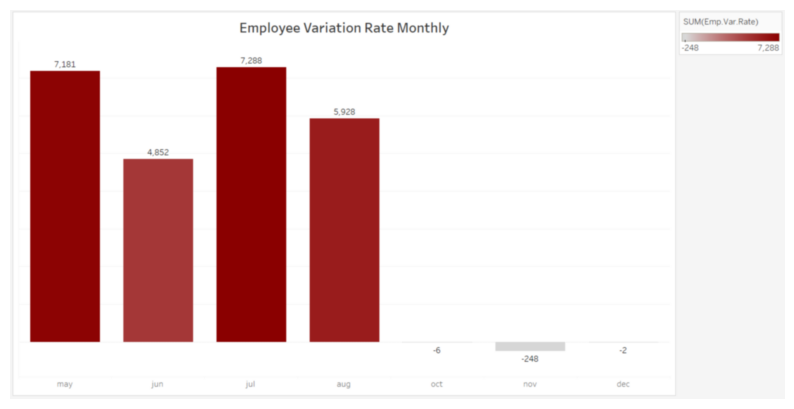

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(image_data[4], interpolation='bicubic')
plt.axis('off')
plt.show()

## **Subscription Rate across different Martial Statuses in Custmers**

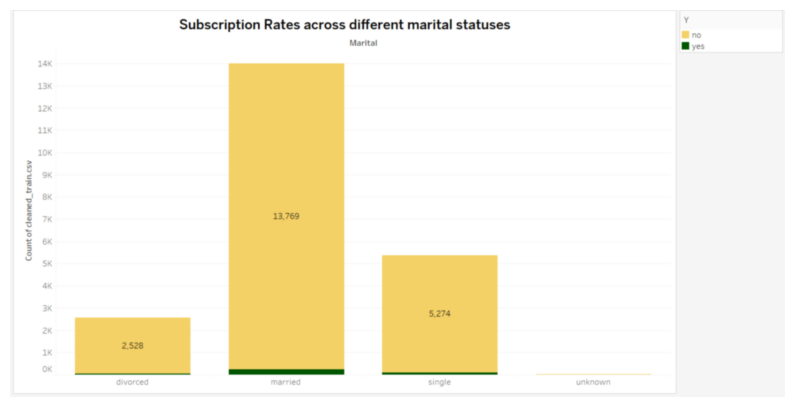

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(image_data[5], interpolation='bicubic')
plt.axis('off')
plt.show()

## **Employee Variation Rate**

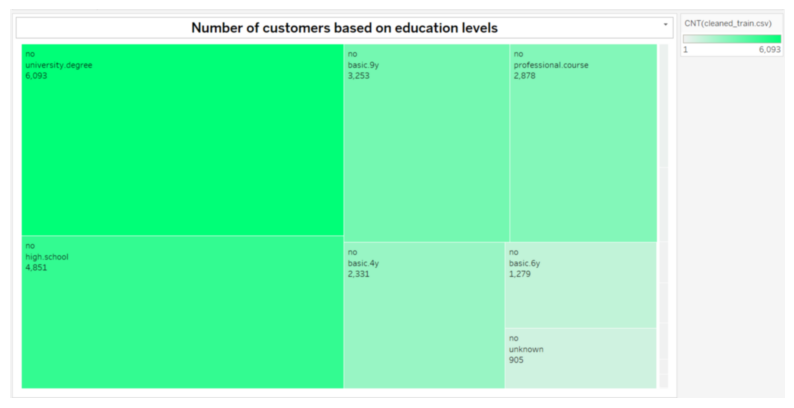

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(image_data[6], interpolation='bicubic')
plt.axis('off')
plt.show()

## **Final Dashboard**

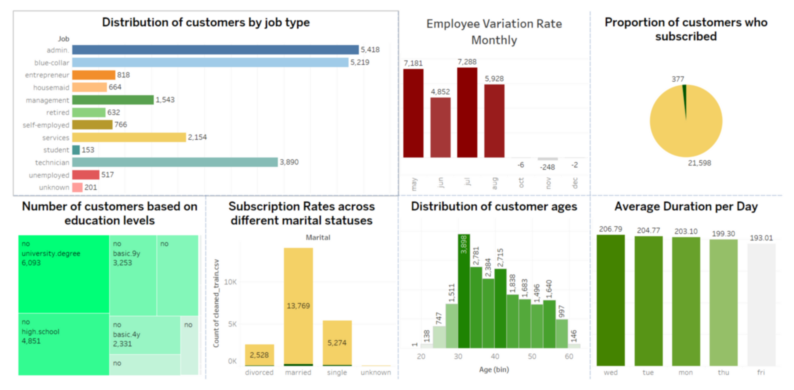

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(image_data[7], interpolation='bicubic')
plt.axis('off')
plt.show()

# <font color='teal'> ***Feature Engineering***

## **Shuffling the Train data**

In [17]:
# Shuffle the training data
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

## **Feature/Target Split**

In [18]:
X = train.drop('y', axis=1)
y = train['y']

## **Train/Val Split**

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## **Label Encoding**

**1- Train Set / Validation set**

In [20]:
cols=X_train.select_dtypes(include=['object']).columns
for col in cols:
  print(col,list(set(X_train[col])))

job ['technician', 'student', 'unknown', 'services', 'housemaid', 'entrepreneur', 'unemployed', 'blue-collar', 'retired', 'management', 'admin.', 'self-employed']
marital ['divorced', 'unknown', 'single', 'married']
education ['university.degree', 'unknown', 'illiterate', 'high.school', 'basic.9y', 'basic.4y', 'basic.6y', 'professional.course']
default ['no', 'yes', 'unknown']
housing ['no', 'yes', 'unknown']
loan ['no', 'yes', 'unknown']
contact ['cellular', 'telephone']
month ['dec', 'oct', 'jun', 'aug', 'jul', 'nov', 'may']
day_of_week ['wed', 'mon', 'tue', 'fri', 'thu']
poutcome ['nonexistent']


In [21]:
mapping = {
    'job': {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4,
            'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9,
            'unemployed': 10, 'unknown': 11},
    'marital': {'divorced': 0, 'married': 1, 'single': 2, 'unknown':3},
    'education': {'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3,
                  'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7},
    'default': {'no': 0, 'yes': 1, 'unknown':2},
    'housing': {'no': 0, 'yes': 1, 'unknown':2},
    'loan': {'no': 0, 'yes': 1, 'unknown':2},
    'contact': {'cellular': 0, 'telephone': 1},
    'month': {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7,
              'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11},
    'day_of_week': {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4},
    'poutcome': {'failure': 0, 'nonexistent': 1, 'success': 2}
}

for col, map_dict in mapping.items():
    X_train[col] = X_train[col].map(map_dict)
    X_val[col] = X_val[col].map(map_dict)

In [22]:
# Mapping for the target variable 'y'
y_mapping = {'no': 0, 'yes': 1}

y_train = y_train.map(y_mapping)
y_val = y_val.map(y_mapping)

**2- Test Set**

In [23]:
cols=test.select_dtypes(include=['object']).columns
for col in cols:
  print(col,list(set(test[col])))

job ['technician', 'student', 'unknown', 'services', 'housemaid', 'unemployed', 'entrepreneur', 'blue-collar', 'retired', 'management', 'admin.', 'self-employed']
marital ['divorced', 'unknown', 'single', 'married']
education ['university.degree', 'unknown', 'illiterate', 'high.school', 'basic.9y', 'basic.4y', 'basic.6y', 'professional.course']
default ['no', 'unknown']
housing ['no', 'yes', 'unknown']
loan ['no', 'yes', 'unknown']
contact ['cellular', 'telephone']
month ['dec', 'oct', 'mar', 'jun', 'apr', 'aug', 'sep', 'jul', 'nov', 'may']
day_of_week ['wed', 'mon', 'tue', 'fri', 'thu']
poutcome ['failure', 'nonexistent', 'success']


In [24]:
for col, map_dict in mapping.items():
    test[col] = test[col].map(map_dict)

## **Data Balancing**

In [25]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

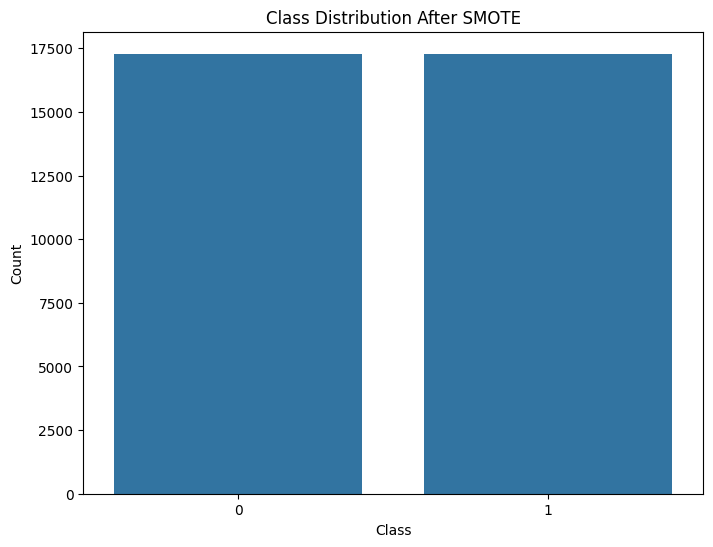

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## **Normalization od Data**

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

# <font color='teal'> ***Machine Learning Models***

## **Random Forest**

### **Model Training**

In [29]:
# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

### **Predicting for Validation Set**

In [30]:
# Make predictions on the validation set
y_pred_val = rf_classifier.predict(X_val_scaled)

### **Evaluation**

In [31]:
# Evaluate the model
print(classification_report(y_val, y_pred_val))
print("Accuracy:", accuracy_score(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4313
           1       0.40      0.29      0.34        82

    accuracy                           0.98      4395
   macro avg       0.69      0.64      0.66      4395
weighted avg       0.98      0.98      0.98      4395

Accuracy: 0.9786120591581342


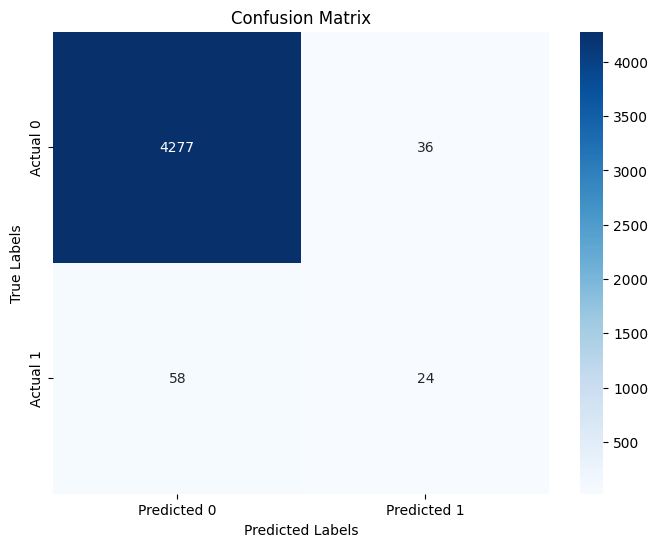

In [32]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### **Predicting For Test set**

In [33]:
# Predict on the test set
y_pred_test = rf_classifier.predict(X_test_scaled)

## **SVM**

### **Model Training**

In [34]:
# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=42)
svm_classifier.fit(X_train_scaled, y_train_resampled)

SVC(C=1, random_state=42)

### **Predicting for Validation Set**

In [35]:
# Predict on the validation set
y_pred_val_svm = svm_classifier.predict(X_val_scaled)

### **Evaluation**

In [36]:
# Evaluate the SVM model
print(classification_report(y_val, y_pred_val_svm))
print("Accuracy:", accuracy_score(y_val, y_pred_val_svm))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      4313
           1       0.14      0.54      0.23        82

    accuracy                           0.93      4395
   macro avg       0.57      0.74      0.60      4395
weighted avg       0.97      0.93      0.95      4395

Accuracy: 0.9315130830489192


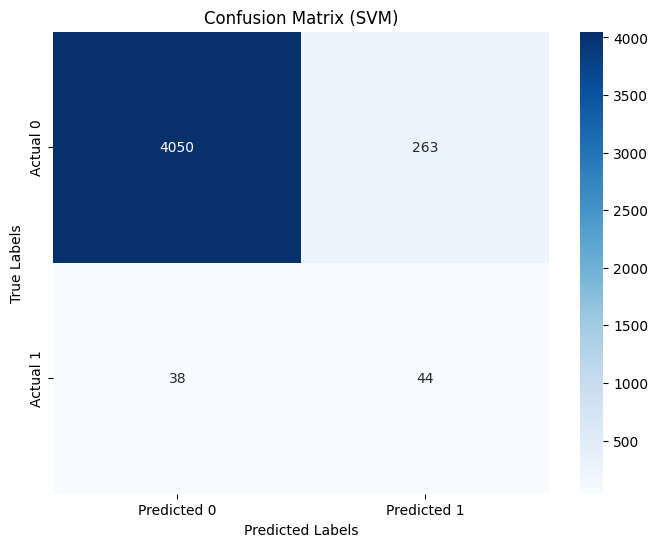

In [37]:
# Compute and plot the confusion matrix for SVM
cm_svm = confusion_matrix(y_val, y_pred_val_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### **Predicting for Test set**

In [38]:
# Predict on the test set using SVM
y_pred_test_svm = svm_classifier.predict(X_test_scaled)